# Resolução de ODE's com Python e Jupyter Notebooks

Resolve a equação diferencial (ODE's) da difusão de oxigénio num ser vivo esférico.
Comparativamente ao Matlab a função ```bvp4c``` no Python com a biblioteca ```scipy```é equivalente a utilizar ```solve_bvp```.


$$
\frac{d^2 n}{dr^2} + \frac{2}{r}\frac{dn}{dr} - \frac{k}{D}n = 0
$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp
import scipy.constants as si_consts
import time

start_time: float = time.perf_counter()

# ---- part b ----
R = 1.0 * 10**(-4)
k = 25.0
D = 1.0 * 10**(-8)
ns = 3.0 * 10**22
special_value = 1.0 * 10**(-7)

def ode(r, y):
    # y[0] = n(r), y[1] = dn/dr
    # dn/dr = y[1]
    # d2n/dr2 = (k/D)*n - (2/r)*dn/dr
    # evitar divisão por zero: domínio começa em special_value > 0
    return np.vstack((
        y[1],
        (k / D) * y[0] - (2.0 / r) * y[1]
    ))

def bc(ya, yb):
    # condições de fronteira:
    # ya[1] = 0  (dn/dr no interior ~ condição de simetria)
    # yb[0] = ns (concentração na superfície)
    return np.array([ya[1], yb[0] - ns])

r_mesh = np.linspace(special_value, R, 100)

# palpite inicial: n ~ ns constante, dn/dr ~ 0
y_init = np.vstack((np.full_like(r_mesh, ns), np.zeros_like(r_mesh)))

sol = solve_bvp(ode, bc, r_mesh, y_init, max_nodes=10000)

if sol.status != 0:
    raise RuntimeError(f"solve_bvp não convergiu: {sol.message}")

- Para visualização gráfica foi utilizada a biblioteca ```matplotlib``` que permite, assim como o matlab, de forma simples, adicionar gráficos dos mais variados formatos, e com formatação personalizada.

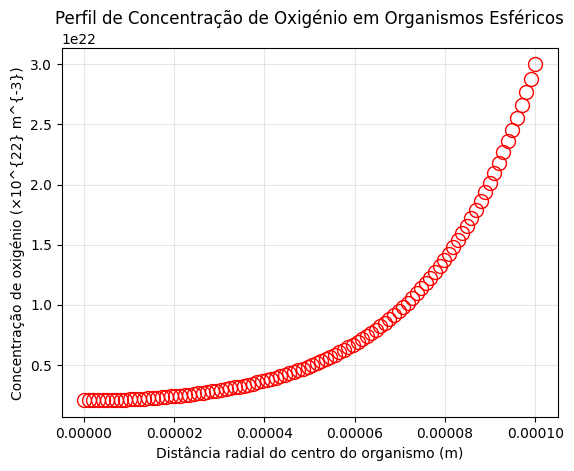

In [2]:
# plot n(r)
r_plot = np.linspace(special_value, R, 100)
y_plot = sol.sol(r_plot)[0]

#N = 100  # número de pontos
#scatter_points = np.linspace(0, len(r_plot) - 1,N, dtype= int )

plt.plot(r_plot, y_plot, "ro", markevery=1, linewidth=1.5, markersize=10, fillstyle='none')
plt.xlabel("Distância radial do centro do organismo (m)")
plt.ylabel("Concentração de oxigénio (×10^{22} m^{-3})")
plt.title("Perfil de Concentração de Oxigénio em Organismos Esféricos")
plt.grid(True, alpha=0.3)
plt.show()

- Para visualização do resultado para a alínea c foi escolhido o uso de texto.
- Ao longo de toda a resolução uma outra biblioteca muito importante foi o ```Numpy```pois permite de forma standardizada utilizar constantes como o π. A biblioteca ```scipy``` também permite de forma standardizada usar constantes como Avogadro por exemplo.
- Para serem acedidos valores na matriz de solução é utilizado o código mais orintado a matemática ```dn_O2_dr = sol.y(2, :);```, porém em Python é utilizado posições de arrays (matrizes unidimensionais) ```n_surface_derivative = sol.sol(R)[1]```.
- Também é possivel no fim da resolução, visualizar o tempo exato que demorou a executar o código.

In [3]:
# ---- part c ----

# dn/dr na superfície r = R
n_surface_derivative = sol.sol(R)[1]

raw_total_consumption = 4.0 * np.pi * R**2 * D * n_surface_derivative

print(f"O valor de moléculas de oxigénio é {raw_total_consumption:.6e}")

# converter para mol/s (SI)
NA = si_consts.Avogadro # constante de Avogadro
total_consumption = raw_total_consumption / NA

print(f"O valor de mol/sec de oxigénio é {total_consumption:.6e}")


print(f"Tempo de Execução: {time.perf_counter() - start_time} segundos")

O valor de moléculas de oxigénio é 1.508136e+12
O valor de mol/sec de oxigénio é 2.504318e-12
Tempo de Execução: 0.11147120800160337 segundos
